In [1]:
import pandas as pd 
import numpy as np 


In [ ]:
#df=pd.read_csv("E:/jai/uqvitalsignsdata/case01/uq_vsd_case01_trenddata.csv")#,on_bad_lines='skip')
df.head()

In [ ]:
df[["RelativeTimeMilliseconds","HR","SpO2","etCO2","awRR","inSEV","inO2","Alarms...","desc1","desc2","desc3"]]
df.head()
df["desc3"].unique()

In [ ]:
l=['SpO2   LOW PERF   ','** SpO2   LOW     ', '** etCO2  LOW     ','AGM NO BREATH     ']
l2=['SpO2 LOW PERF','SpO2 LOW ', 'etCO2 LOW','AGM NO BREATH']
for i in range(4):
    df[str(f"is_{l2[i]}")] = np.where(
        (df["Alarms..."] == l[i]) | 
        (df["desc1"] == l[i]) | 
        (df["desc2"] == l[i]) | 
        (df["desc3"] == l[i]), 
        1, 
        0
    )

# Show filtered results
df[df["is_SpO2 LOW PERF"] == 1].head()

In [ ]:
print(df.columns)
x=df[["HR","SpO2","etCO2","awRR","is_SpO2 LOW PERF","is_SpO2 LOW ","is_etCO2 LOW","is_AGM NO BREATH"]]
x=x.dropna()
x.head()    
from sklearn.model_selection import train_test_split
y=x[['is_SpO2 LOW PERF', 'is_SpO2 LOW ', 'is_etCO2 LOW',
       'is_AGM NO BREATH']]
x=x[["HR","SpO2","etCO2","awRR"]]
print(x.shape,y.shape)
y.head()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = MultiOutputClassifier(base_model)

# Train Model
model.fit(x_train, y_train)

# Predict on Test Data
Y_pred = model.predict(x_test)
print(Y_pred)
# Evaluate Model
accuracy = accuracy_score(y_test, Y_pred)
print("Model Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, Y_pred))


In [ ]:
x=df[["RelativeTimeMilliseconds","HR","SpO2","etCO2","awRR","is_SpO2 LOW PERF","is_SpO2 LOW ","is_etCO2 LOW","is_AGM NO BREATH","inSEV","inO2"]]
x=x.dropna()
"""y=x[["inSEV","inO2"]]
x=x[["RelativeTimeMilliseconds","HR","SpO2","etCO2","awRR","is_SpO2 LOW PERF","is_SpO2 LOW ","is_etCO2 LOW","is_AGM NO BREATH"]]
y.head()"""

In [ ]:
print(x.columns,y.columns)

#2 RNN

In [ ]:
import pandas as pd
import glob

folder_path = "E:\\jai\\uqvitalsignsdata\\csv_files\\"

# Use glob to find all CSV files in the folder
csv_files = glob.glob(folder_path + "*.csv")

for file_path in csv_files:
    # Define the string you want to append
    string_to_append = ",desc8"

    # Open the file in read mode to get the lines
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Modify the first line by appending the string
    if lines:
        lines[0] = lines[0].strip() + string_to_append + '\n'

    # Open the file again in write mode to save the changes
    with open(file_path, 'w') as file:
        file.writelines(lines)

    print(f"String appended to the first line of {file_path} successfully!")


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [2]:
time_steps = 20  # Lookback period
X_seq, Y_seq = [], []


In [4]:
import pandas as pd
import glob

# Define the folder path containing the CSV files
folder_path = "E:\\jai\\uqvitalsignsdata\\csv_files\\"

# Use glob to find all CSV files in the folder
csv_files = glob.glob(folder_path + "*.csv")
print(csv_files)
# Initialize an empty DataFrame to append data
df_combined = pd.DataFrame()
l=['SpO2   LOW PERF   ','** SpO2   LOW     ', '** etCO2  LOW     ','AGM NO BREATH     ']
l2=['SpO2 LOW PERF','SpO2 LOW ', 'etCO2 LOW','AGM NO BREATH']
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
# Iterate through each CSV file and append to the combined DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    
    df[["RelativeTimeMilliseconds","HR","SpO2","etCO2","awRR","inSEV","inO2","Alarms...","desc1","desc2","desc3","desc4","desc5","desc6","desc7"]]
    df.head()
    
    for i in range(4):
        df[str(f"is_{l2[i]}")] = np.where(
            (df["Alarms..."] == l[i]) | 
            (df["desc1"] == l[i]) | 
            (df["desc2"] == l[i]) | 
            (df["desc4"] == l[i]) | 
            (df["desc5"] == l[i]) | 
            (df["desc6"] == l[i]) | 
            (df["desc7"] == l[i]) | 
            (df["desc3"] == l[i]), 
            1, 
            0
        )
    x=df[["RelativeTimeMilliseconds","HR","SpO2","etCO2","awRR","is_SpO2 LOW PERF","is_SpO2 LOW ","is_etCO2 LOW","is_AGM NO BREATH","inSEV","inO2"]]
    x=x.dropna()


    df = x.sort_values(by="RelativeTimeMilliseconds")
    df.set_index("RelativeTimeMilliseconds", inplace=True)

    # Features (X) & Targets (Y)
    X = df.drop(columns=['inSEV', 'inO2']).values  # Features
    Y = df[['inSEV', 'inO2']].values  # Targets

    # Normalize Data

    if x.empty:
        print(f"Skipping {file} due to empty data after dropping NaNs.")
        continue
    X = scaler_X.fit_transform(X)
    Y = scaler_Y.fit_transform(Y)

    # Reshape X for RNN: (samples, timesteps, features)


    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])  # Last 10 steps as input
        Y_seq.append(Y[i + time_steps]) 
    print(file)   # Next step as output
    df_combined = pd.concat([df_combined, df], ignore_index=True)

# Now df_combined contains all the rows from the CSV files
print(df_combined)

['E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case01_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case02_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case03_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case04_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case05_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case06_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case07_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case08_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case09_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case10_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case11_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case12_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case13_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_files\\uq_vsd_case14_trenddata.csv', 'E:\\jai\\uqvitalsignsdata\\csv_f

C:\Users\mahasarabesh\AppData\Local\Temp\ipykernel_17800\1301487483.py:18: DtypeWarning: Columns (58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case12_trenddata.csv
E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case13_trenddata.csv
Skipping E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case14_trenddata.csv due to empty data after dropping NaNs.
Skipping E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case15_trenddata.csv due to empty data after dropping NaNs.
E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case16_trenddata.csv
Skipping E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case17_trenddata.csv due to empty data after dropping NaNs.
Skipping E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case18_trenddata.csv due to empty data after dropping NaNs.
Skipping E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case19_trenddata.csv due to empty data after dropping NaNs.
E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case20_trenddata.csv
E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case21_trenddata.csv
Skipping E:\jai\uqvitalsignsdata\csv_files\uq_vsd_case22_trenddata.csv due to empty data after dropping NaNs.
E:\jai\uqvitalsignsdata\csv_fi

In [5]:
X_seq, Y_seq = np.array(X_seq), np.array(Y_seq)
print(X_seq.shape)
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_seq, test_size=0.2, random_state=42)

(255844, 20, 8)


In [6]:
# Build RNN Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(Y_train.shape[1], activation='linear')  # Output Layer (2 neurons for inSEV, inO2)
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae','accuracy'])

# Model Summary
model.summary()


e:\Software\anaconda3\envs\tt\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,698 (475.38 KB)

 Trainable params: 121,698 (475.38 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_rnn_model.keras", save_best_only=True, monitor="val_loss")

# Train Model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/100
6397/6397 ━━━━━━━━━━━━━━━━━━━━ 135s 21ms/step - accuracy: 0.7726 - loss: 0.0508 - mae: 0.1706 - val_accuracy: 0.8405 - val_loss: 0.0317 - val_mae: 0.1181
Epoch 2/100
6397/6397 ━━━━━━━━━━━━━━━━━━━━ 133s 21ms/step - accuracy: 0.8517 - loss: 0.0280 - mae: 0.1120 - val_accuracy: 0.8685 - val_loss: 0.0247 - val_mae: 0.0984
Epoch 3/100
6397/6397 ━━━━━━━━━━━━━━━━━━━━ 133s 21ms/step - accuracy: 0.8732 - loss: 0.0225 - mae: 0.0955 - val_accuracy: 0.8848 - val_loss: 0.0189 - val_mae: 0.0824
Epoch 4/100
6397/6397 ━━━━━━━━━━━━━━━━━━━━ 133s 21ms/step - accuracy: 0.8826 - loss: 0.0198 - mae: 0.0873 - val_accuracy: 0.8795 - val_loss: 0.0201 - val_mae: 0.0849
Epoch 5/100
6397/6397 ━━━━━━━━━━━━━━━━━━━━ 132s 21ms/step - accuracy: 0.8914 - loss: 0.0178 - mae: 0.0809 - val_accuracy: 0.8882 - val_loss: 0.0161 - val_mae: 0.0742
Epoch 6/100
6397/6397 ━━━━━━━━━━━━━━━━━━━━ 136s 21ms/step - accuracy: 0.8976 - loss: 0.0164 - mae: 0.0769 - val_accuracy: 0.8880 - val_loss: 0.0196 - val_mae: 0.0832
Epoc

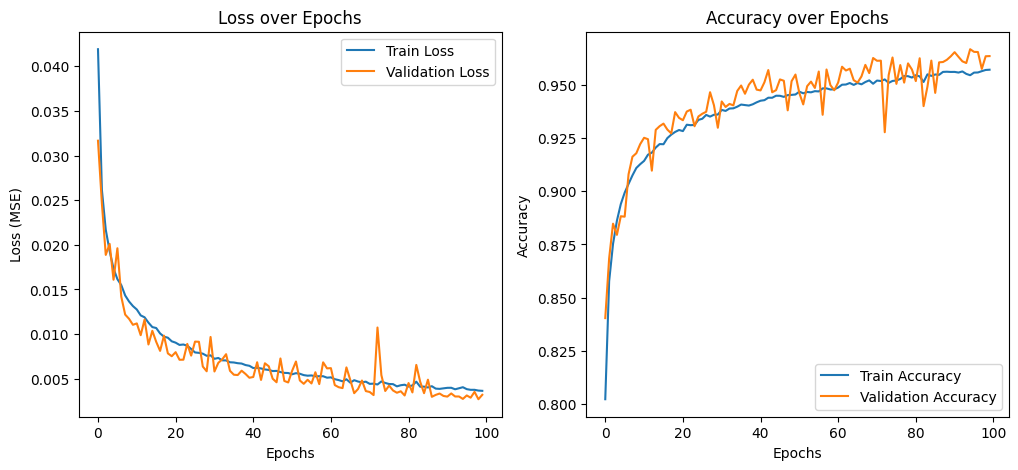

In [11]:
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
# Accuracy Plot (If accuracy is meaningful in your task)
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

plt.show()

In [9]:
history_df = pd.DataFrame(history.history)

# Save history to CSV
history_df.to_csv("training_history.csv", index=False)

print("Training history saved successfully!")

Training history saved successfully!


In [ ]:
# Load Best Model
model.load_weights("best_rnn_model.keras")

# Evaluate
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Predict
Y_pred = model.predict(X_test)

# Convert Back to Original Scale
Y_test_original = scaler_Y.inverse_transform(Y_test)
Y_pred_original = scaler_Y.inverse_transform(Y_pred)

# Display Results
df_results = pd.DataFrame({"Actual inSEV": Y_test_original[:, 0], "Predicted inSEV": Y_pred_original[:, 0],
                           "Actual inO2": Y_test_original[:, 1], "Predicted inO2": Y_pred_original[:, 1]})
print(df_results.head())

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('G:/mini project/final/best_rnn_model.keras')  # Replace with your model path

# Prepare input data for testing
# Assuming your input data is a numpy array of shape (num_samples, timesteps, features)
# Example: Generate dummy test data
num_samples = 100
timesteps = 50  # Same as the sequence length used during training
features = 1    # Number of features in your time series data
test_data = np.random.rand(num_samples, timesteps, features)  # Replace with your actual test data

# Generate predictions
predictions = model.predict(test_data)

# If your model predicts the next time step, compare with ground truth
# Example: Assuming you have ground truth data
ground_truth = np.random.rand(num_samples, 1)  # Replace with your actual ground truth data

# Evaluate predictions (e.g., calculate Mean Squared Error)
mse = tf.keras.losses.MeanSquaredError()
loss = mse(ground_truth, predictions).numpy()
print(f"Mean Squared Error: {loss}")

# Visualize predictions vs ground truth
plt.figure(figsize=(10, 6))
plt.plot(ground_truth, label='Ground Truth')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('Ground Truth vs Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()

ModuleNotFoundError: No module named 'numpy'